In [1]:
from datasets.ears_speech_data import EARSSpeechDataset
from utils.utils import load_config
import librosa
import numpy as np
import matplotlib.pyplot as plt


cfg_path = "config.yaml"
cfg = load_config(cfg_path)

speech_dataset = EARSSpeechDataset(cfg, type="train")

28 11264 32.0
(721, 33)
True


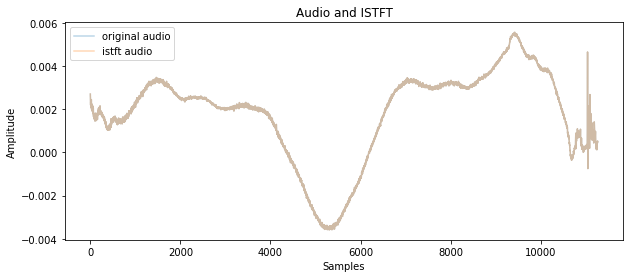

In [31]:
"""
From EARS paper: "For all methods, STFTs are computed using a Hann window of 32 ms and a hop size of 8 ms."
-> Hann window of 1411 samples at 44.1 and hop size of 352 samples at 44.1 kHz
"""

nfft = 1440
nhop = 352
nfrms = 32

audio_duration = nfrms * nhop

i = 0
audio = speech_dataset[i][0]
while len(audio) < audio_duration:
    i += 1
    audio = speech_dataset[i][0]
audio = audio[:audio_duration]

n_frames = 1 + int((len(audio) - nfft) / nhop)
print(n_frames, len(audio), len(audio)/nhop)

stft = librosa.stft(
    audio,
    n_fft=nfft,
    hop_length=nhop,
    win_length=nfft,
    window='hann',
    center=True
)
print(stft.shape)

istft = librosa.istft(
    stft,
    n_fft=nfft,
    hop_length=nhop,
    win_length=nfft,
    window='hann',
    center=True
)

# check if istft is equal to original audio
print(np.allclose(audio, istft, atol=1e-10))

# plot the audio and istft
plt.figure(figsize=(10, 4))
plt.plot(audio, label='original audio', alpha = 0.3)
plt.plot(istft, label='istft audio', alpha = 0.3)
plt.legend()
plt.title('Audio and ISTFT')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()
